In [1]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler 

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# 2) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from IPython.display import display
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 3) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor 
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score # accuracy of classification
#for accurace of regression use model.score or cross_val_score

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 4) Model summary = features importance and effect + sharp values
import eli5
from eli5.sklearn import PermutationImportance # feature importance
#from pdpbox import pdp, get_dataset, info_plots #for pdp plots
import shap  # package used to calculate Shap values
import time

C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### 1) starting with Data
* a) Explore Data
* b) Data dtypes
* c) Discover errors -> NaN 
* d) summary (describe)

#### a) Explore Data
* encoding of file to read, shape, .head()

In [2]:
# know encoding of file
file = open("train.csv", 'rb')
result = chardet.detect(file.read(10000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
train_data = pd.read_csv("Train.csv", encoding='ascii') #Train Data
file = open('Test.csv', 'rb')
result = chardet.detect(file.read(10000))
test_data = pd.read_csv('Test.csv', encoding = result['encoding']) #Test Data
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train_data.shape # 8523 record and 12 (11 features and 1 target)

(8523, 12)

#### b) Data dtypes
* check and correct dtypes (if data is year only dont change its format to datetime)

In [5]:
train_data.info() #year is intger so dont change its format to datetime as its only 1 number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# check if datatype is wrong is a number has Dtype as string ?
# df['incorrect column'] = df['incorrect column'].astype('int64') # wrong dtype
# df['parsed_date'] = pd.to_datetime(df['date'], format="%m/%d/%y") or infer_datetime_format=True #date format

#### C) errors -> NaN
* check uniques to replace null with nan

In [7]:
# see data if it have something weird replace it with NaN
columns = train_data.columns
for col in columns:
    print(col + ':')
    print(train_data[col].unique(), '\n')

Item_Identifier:
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Weight:
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    

In [8]:
# data in column "no columns" have weird sign '@' should be replaced as NaN
# train_data['Outlet_Size'] = train_data['Outlet_Size'].replace('@', value=np.nan)

#### d) Summary of data

In [9]:
train_data.describe() #show nuemric columns summary but numeric only

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# check NaNs
train_data.isnull().sum() #at 2 columns Item_weight (neumric dtype) & Outlet_Size (categorical dtype)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# manpulate data by converting 1 row to list and change if you want and update dataframe by assigning 3ady
## list(data.iloc[0]) # [iloc 0:m means 0->m-1 but loc 0:m means 0->m]
# to get values of column .values like .shape
# train_data['Item_Identifier'].values # list of data values

### 2) Data preprocessing
Note: same process happen in train must happen in test with parameters of train as model cant see test data yet
* a) NaN
* b) Duplicates
* c) Outliers
* d) data inconsistency (categorical only)

#### a) NaN
* remove the whole row: if NaN at target  (or) if NaN is so small at a column
* same method goes to Test Data

In [12]:
# NaN so is it neumric to put median or mode
# or is it catergorical column so put mode
train_data['Item_Weight'].median()

12.6

In [13]:
train_data['Outlet_Size'].mode() # series so get first element only

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
train_data['Outlet_Size'].mode().values[0]

'Medium'

##### Neumeric replace of NaN

In [15]:
median_1 = train_data['Item_Weight'].median()
train_data['Item_Weight'] = train_data['Item_Weight'].replace(np.nan, value=median_1)

##### Categorical replace of NaN

In [16]:
mode_1 = train_data['Outlet_Size'].mode()[0]
train_data['Outlet_Size'] = train_data['Outlet_Size'].replace(np.nan, value=mode_1)

In [17]:
train_data.isnull().sum() # 0 Null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
# Same at Test data
# replace its NaNs
test_data['Item_Weight'] = test_data['Item_Weight'].replace(np.nan, value=median_1)
test_data['Outlet_Size'] = test_data['Outlet_Size'].replace(np.nan, value=mode_1)
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### b) Duplicates
* detect
* handle

In [19]:
feat_columns = columns.drop('Item_Outlet_Sales') # as columns pandas_list so wont change like strings and matrix and df
train_data.duplicated(feat_columns).sum() # but if its list will change (mutable)

0

In [20]:
# if there was duplicates rows to drop them:
train_data.drop_duplicates()
train_data.duplicated(feat_columns).sum()

0

In [21]:
# Same for Test data


#### c) Outliers
* detect (boxplot)
* handling

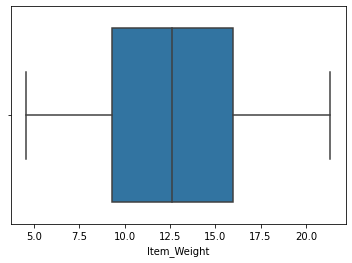

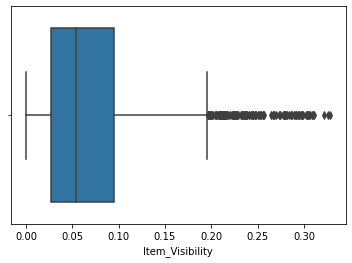

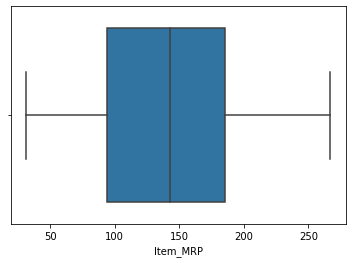

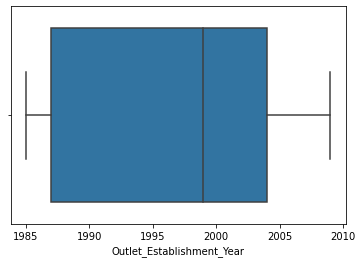

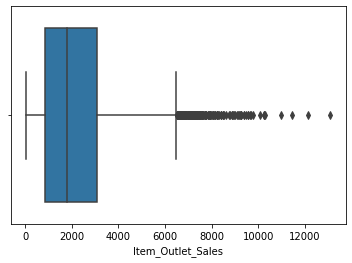

In [22]:
for col in columns: 
    if not (train_data[col].dtype == 'object'):
        sns.boxplot(x = train_data[col])
        plt.show()

In [23]:
outliers = ['Item_Visibility', 'Item_Outlet_Sales'] 
#outliers could be feature or target see its dist first mabye log scale remove it if its right skewed
outliers

['Item_Visibility', 'Item_Outlet_Sales']

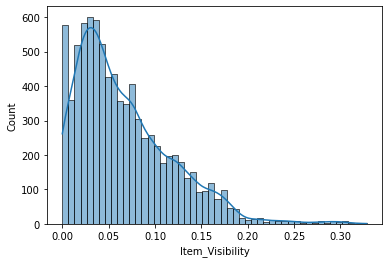

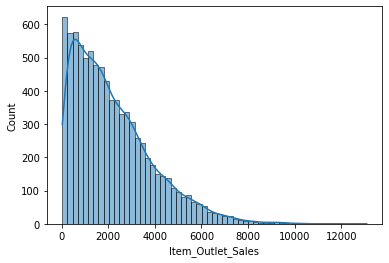

In [24]:
for col in outliers: # dist of outliers are right skewd
    #so try log1p (log(1+value)) to remove it in next cell and check its dist and outliers
    sns.histplot(x = train_data[col], kde=True)
    plt.show()

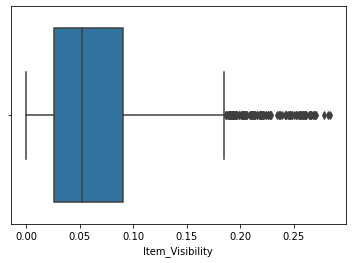

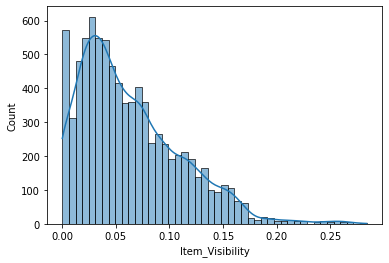

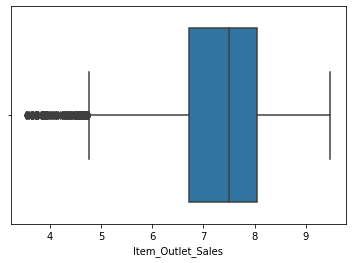

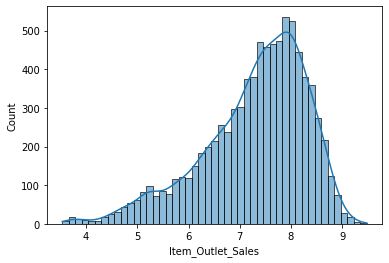

In [25]:
for col in outliers:  # try log1p (log(1+value)) to remove outlier and check its dist and outliers if it failled just remove outliers manually
    if not (train_data[col].dtype == 'object'):
        sns.boxplot(x = np.log1p(train_data[col]))
        plt.show()
        sns.histplot(x = np.log1p(train_data[col]), kde=True)
        plt.show()

In [26]:
# there is still outliers so remove them manually by remove_outlier

In [27]:
# target and item_visability are outliers
def remove_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [28]:
low_item_visability, high_item_visability = remove_outlier(train_data['Item_Visibility']) #lower and upper range
train_data[(train_data['Item_Visibility'] > high_item_visability) | (train_data['Item_Visibility'] < low_item_visability)]
#visualized 144 outliers from Item_visibility feature as we can see its very very large like in boxplot

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,12.60,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,12.60,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.60,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
334,FDC41,12.60,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12.60,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,12.60,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


 Min: 0.0 Max: 0.328390948 
 mean: 0.06613202877895108 std: 0.05159782232113512 
 median: 0.053930934 
 mode: 0.0


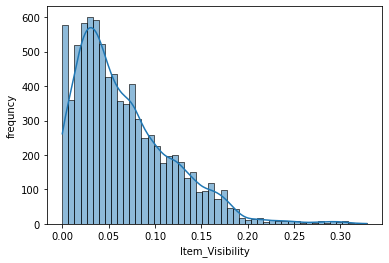

 Min: 33.29 Max: 13086.9648 
 mean: 2181.288913575032 std: 1706.499615733833 
 median: 1794.331 
 mode: 958.752


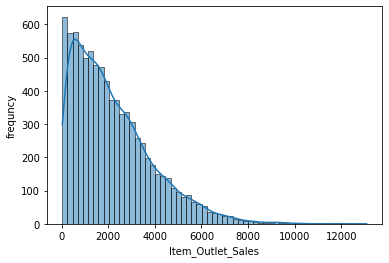

In [29]:
# Z-score and IQR used in any dist
# dist of outliers ! if dist is normal better use Z-score else use IQR
for col in outliers:
    print(' Min:', train_data[col].min(), 'Max:', train_data[col].max(), '\n mean:', train_data[col].mean(), 'std:', train_data[col].std(),'\n', 'median:', train_data[col].median(), '\n', 'mode:', train_data[col].mode()[0])
    sns.histplot(x= train_data[col], kde=True)
    plt.ylabel('frequncy')
    plt.show() # right / +ve skewed

In [30]:
# 1st Z-score
# # a) std
# # lower_limit = mean - 3 * std; upper_limit = mean + 3 * std
# # b) Z-score for each col of outliers
# train_data['z_score'] = (train_data['Item_Visibility'] - train_data['Item_Visibility'].mean()) / train_data['Item_Visibility'].std()
# train_data[train_data['z_score'] > 3] #these are outliers you should remove or replace

-0.07440424500000001 0.195979015


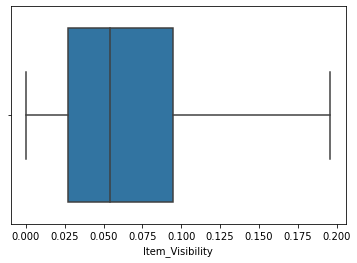

-2566.3261 6501.8699


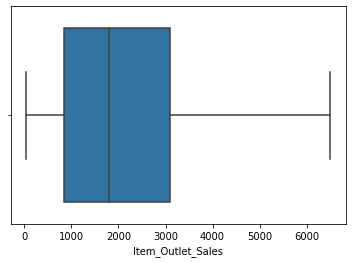

In [31]:
# 2nd: IQR
# replace outlier of larger than upper_limit with the value of upper limit
# and lower that lower_limit with lower limit
for col in outliers:
    low_item_visability, high_item_visability = remove_outlier(train_data[col]) #lower and upper range
    train_data[col] = np.where(train_data[col] < low_item_visability, low_item_visability, train_data[col])
    train_data[col] = np.where(train_data[col] > high_item_visability, high_item_visability, train_data[col])
    print(low_item_visability, high_item_visability)
    sns.boxplot(x=train_data[col])
    plt.show()

In [32]:
# 3rd remove outliers
# new_dataframe = train_data[(train_data['Item_Visibility'] > high_item_visability) | (train_data['Item_Visibility'] < low_item_visability)]

In [33]:
# same for Test data 


#### d) Data inconsistency
* 80% lower + strip
* 20% fuzzywuzzy
* any strange pattern in uniques

In [34]:
for col in columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].str.lower()
        train_data[col] = train_data[col].str.strip()
train_data['Item_Fat_Content'].unique()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

In [35]:
# see data if it have something weird replace it with NaN
# fuzzyy wuzzy
train_data['Item_Fat_Content'][np.where(train_data['Item_Fat_Content'] == 'lf')[0]] = 'low fat'
train_data['Item_Fat_Content'][np.where(train_data['Item_Fat_Content'] == 'reg')[0]] = 'regular'
train_data['Item_Fat_Content'].unique()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array(['low fat', 'regular'], dtype=object)

In [36]:
# same for Test data 


### 3) EDA (Explinatory Data Analysis)

### Univariate Analysis

From EDA url

**For each variable (independant = (features) or dependant = (Label)) get 1, 2, 3 by a & b**

1) dtype, count, unique values

2) min, max, mean, median, mode, std

3) dist + skewness & count (pie or countplot) 


* a) numeric variable: distrbution of each feature.
* b) categorical variable: percentages.

### bivariate Analysis

**Relation between independant variable and target (dependant variable)**

1) corr matrix by heatmap (remove one feature corr btn them is very large corr > 0.9, as they should be independant variables)

2) a, b & c

a) Numerical vs. Numerical
1. Scatterplot
2. Line plot (for trends)
3. Heatmap for correlation (correlation matrix) .corr
4. Joint plot

b) Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4.Swarm plot

c) Two Categorical Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

### Multivariate Analysis

**just use pairplot**

---

### univariate analysis
#### a) numeric variable

In [37]:
feat_columns = columns.drop('Item_Outlet_Sales')
numeric_feat = []
catgorical_feat = []
for col in feat_columns:
    if train_data[col].dtype == 'object':
        catgorical_feat.append(col)
    else:
        numeric_feat.append(col)
print('numeric feat:', numeric_feat)
print('categorical feat:', catgorical_feat)

numeric feat: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical feat: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


 Min: 4.555 Max: 21.35 
 mean: 12.81341957057374 std: 4.227240406467752 
 median: 12.6 
 mode: 12.6


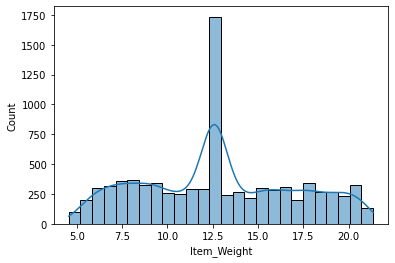

 Min: 0.0 Max: 0.195979015 
 mean: 0.06530699388924087 std: 0.04884117472934811 
 median: 0.053930934 
 mode: 0.0


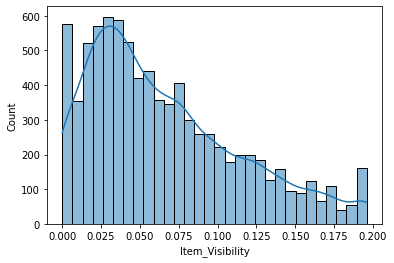

 Min: 31.29 Max: 266.8884 
 mean: 140.9927819781767 std: 62.27506651219046 
 median: 143.0128 
 mode: 172.0422


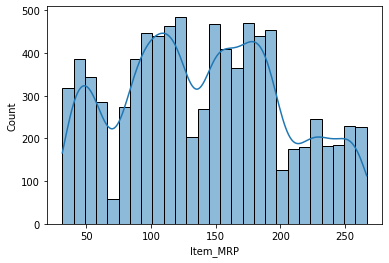

 Min: 1985 Max: 2009 
 mean: 1997.8318667135984 std: 8.371760408092655 
 median: 1999.0 
 mode: 1985


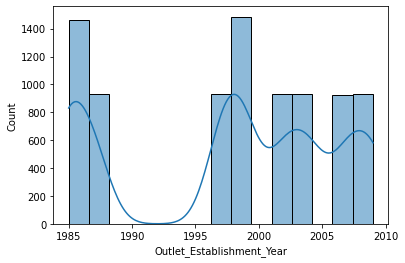

In [38]:
for col in numeric_feat:
    sns.histplot(x = train_data[col], kde=True)
    print(' Min:', train_data[col].min(), 'Max:', train_data[col].max(), '\n mean:', train_data[col].mean(), 'std:', train_data[col].std(),'\n', 'median:', train_data[col].median(), '\n', 'mode:', train_data[col].mode()[0])
    plt.show() #from outlet 017 and 027 have alot of item weights 12.5

**Note:** 

**Item feat:**

1) item weight in normal dist have peak item_weight = 12.5 alot of items have weight 12.5

2) Item_weight in right skew most of items visability btn 0 -> 1

3) item_MPR = item_no * selling_price in unskewed most of items sold btn 100->200 dollars revunue

**Outlet feat:**

1) outlet year establishment unskewed also most of them build after 1995

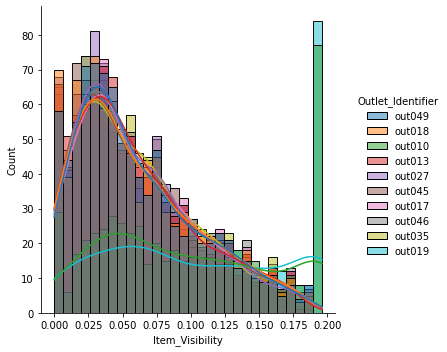

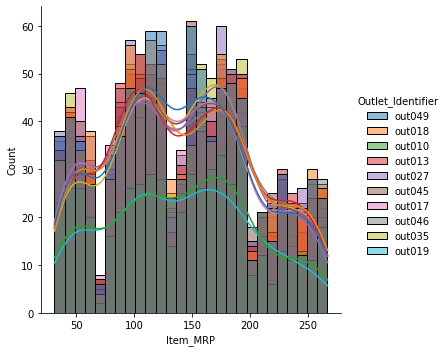

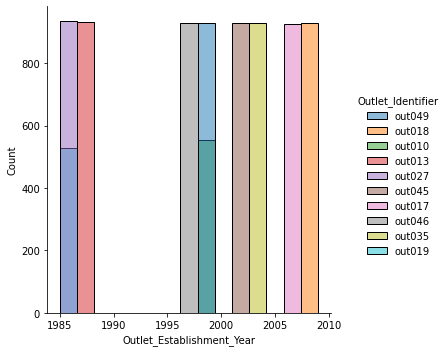

In [39]:
for col in numeric_feat[1:]:
    sns.displot(x = train_data[col], kde=True, hue=train_data['Outlet_Identifier'])
    plt.show()

Note:

Outlets are clear of each item weight visablity, MRP, year

 Min: 33.29 Max: 6501.8699 
 mean: 2156.3130158864246 std: 1624.8630689302586 
 median: 1794.331 
 mode: 6501.8699


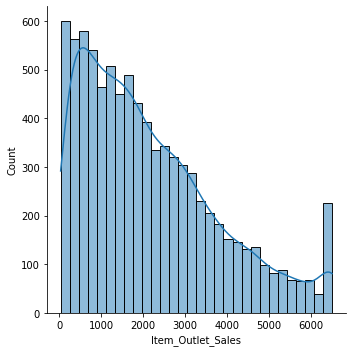

In [40]:
col = 'Item_Outlet_Sales'
sns.displot(x = train_data[col], kde=True)
print(' Min:', train_data[col].min(), 'Max:', train_data[col].max(), '\n mean:', train_data[col].mean(), 'std:', train_data[col].std(),'\n', 'median:', train_data[col].median(), '\n', 'mode:', train_data[col].mode()[0])
plt.show()

**Note:**

Label is right skewed most of data between 0 to 5000

#### b) catgorical variable

In [41]:
plt.rcParams['font.size'] = 13

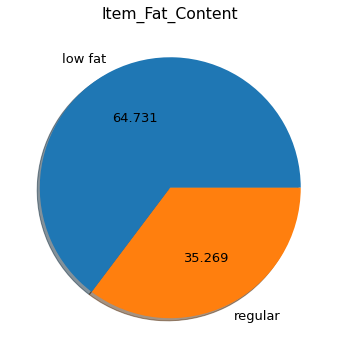

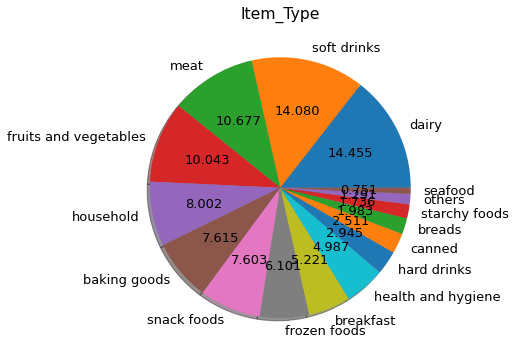

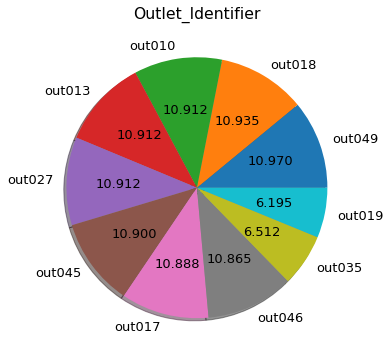

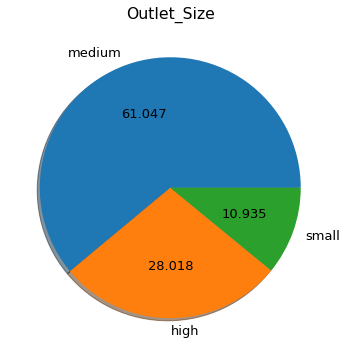

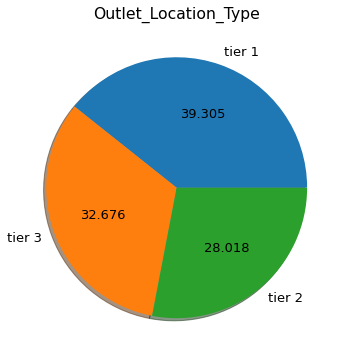

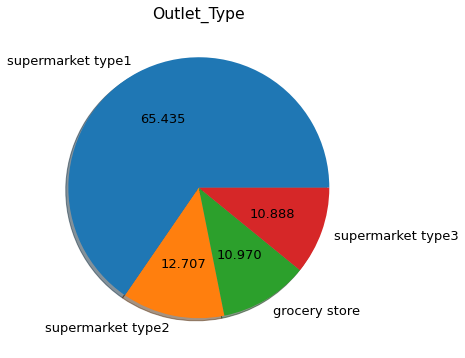

In [42]:
for col in catgorical_feat[1:]:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.pie(train_data[col].value_counts(),
           labels=train_data[col].unique(),
            shadow=True,
            autopct='%.3f')
    plt.show()

Note:

**Items:**

1) Most of item_fat are low fat or regular

2) Item_type in most of data is soft drinks and dairy

3) Items equaly sold in all outlets

**Outlets:**

4) most outlets are medium and high size

5) items equaly sold in all Outlets location

6) most of data have outlet_type of supermarket type1

**So, Outlets are balanced classes**

---

### bivariate Analysis
 * corr matrix then analysis

<AxesSubplot:>

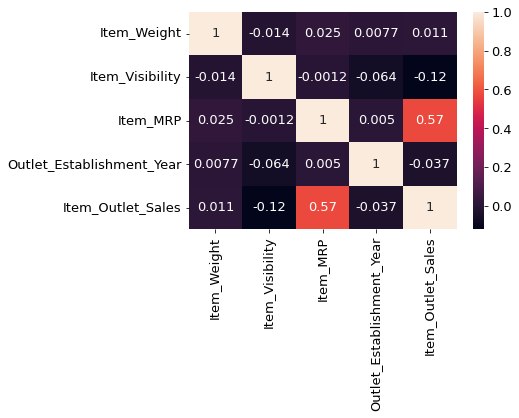

In [43]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True)

**Note:**

1) Corelation btn independant variables are small so thats good they are independant and we wont remove any of features

2) largest corr with label is 0.57 (last column) with item_MRP which means output have nearly same dist with item_MRP so item_MRP can affect output largely so consider it at feature eng 

#### a) Num vs Num

In [44]:
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013744,0.024951,0.007739,0.010887
Item_Visibility,-0.013744,1.000000,-0.001163,-0.064105,-0.120418
Item_MRP,0.024951,-0.001163,1.000000,0.005020,0.574554
Outlet_Establishment_Year,0.007739,-0.064105,0.005020,1.000000,-0.037133
Item_Outlet_Sales,0.010887,-0.120418,0.574554,-0.037133,1.000000


pearson correaltion=  0.01088657456324779


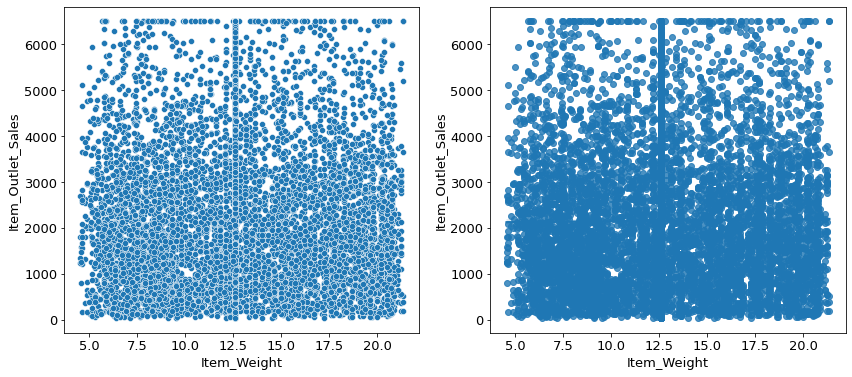

pearson correaltion=  -0.12041795912963024


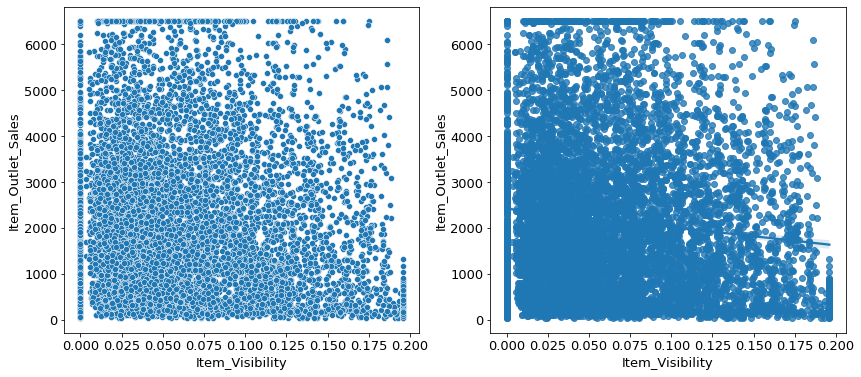

pearson correaltion=  0.574553711146266


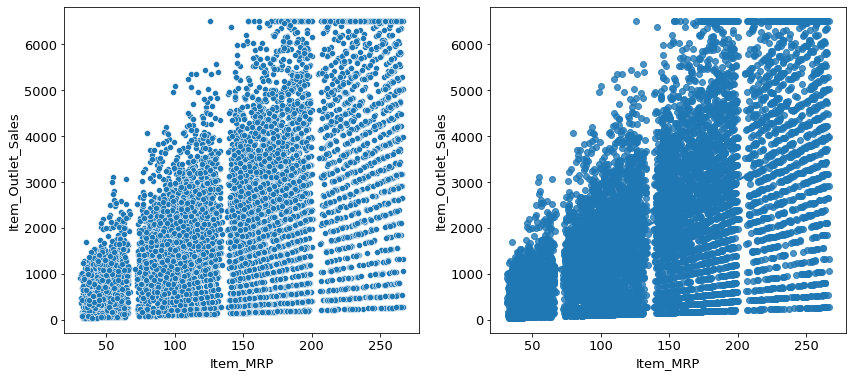

pearson correaltion=  -0.037132826733449614


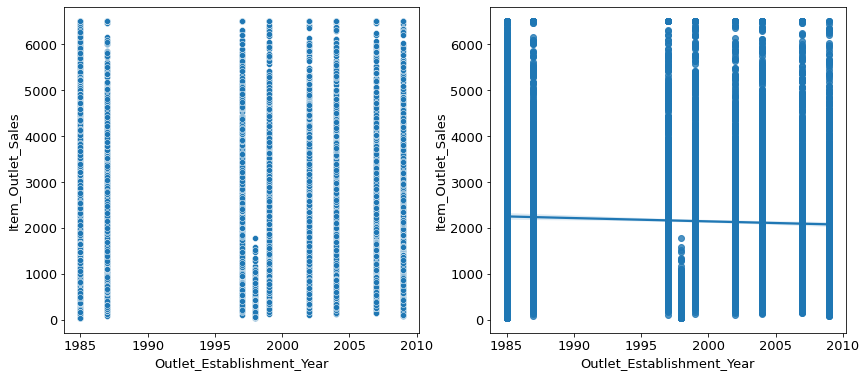

In [45]:
i = 0
for col in numeric_feat: #each independant numeric vs label
    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    fig
    sns.scatterplot(x = train_data[col], y = train_data['Item_Outlet_Sales'], ax=axes[0])
    sns.regplot(x = train_data[col], y = train_data['Item_Outlet_Sales'], ax=axes[1])
    print("pearson correaltion= ", corr_matrix.iloc[-1, i])
    plt.show()
    i = i + 1

#### b) Cat vs Num

36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


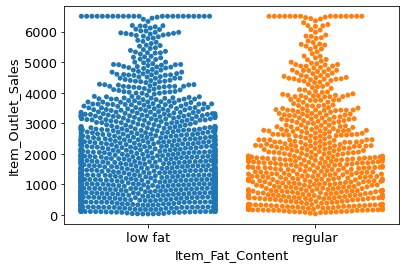

40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
46.5% of the points cannot be placed; you may want to de

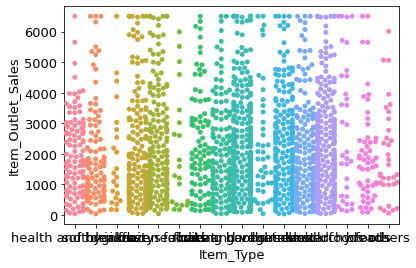

30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
46.3% of the points cannot be placed; you may want to d

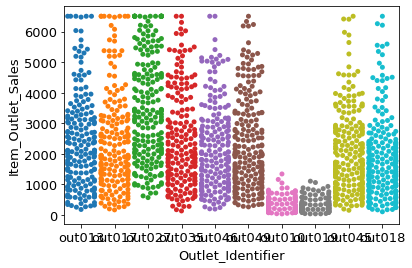

49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


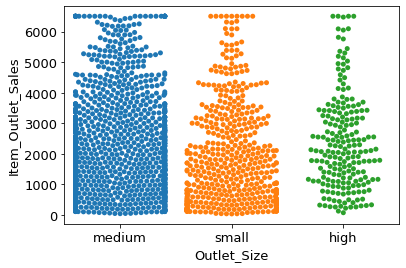

29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


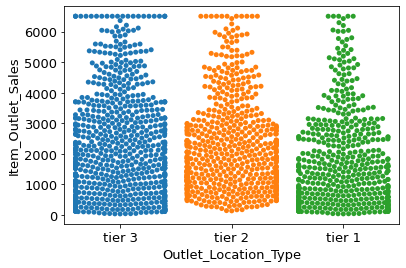

63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


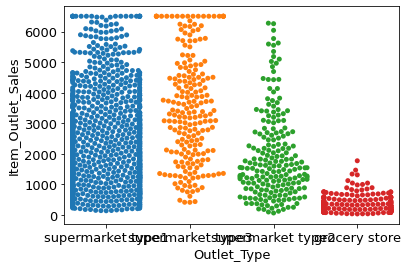

In [46]:
for col in catgorical_feat[1:]: #each independant numeric vs label
    sns.swarmplot(x = train_data[col].sample(4000), y = train_data['Item_Outlet_Sales'].sample(4000))
    plt.show()

Note:

- at item_fat_content largest item_outlet_sales was at regular and low fat as we seen already
- Item_type most of types have large item_outlet_sales
- outlet_identifier doesnt effect howver here out027 have largest item_outlet_sales
- medium and small company have large item_outlet_sales (and Tier 3 locations too)
- super market type 3 have largest item_outlet_sales

#### c) Cat vs Cat

In [47]:
# label/traget is not categorical

### C) Multivariate Analysis

**just use pairplot**

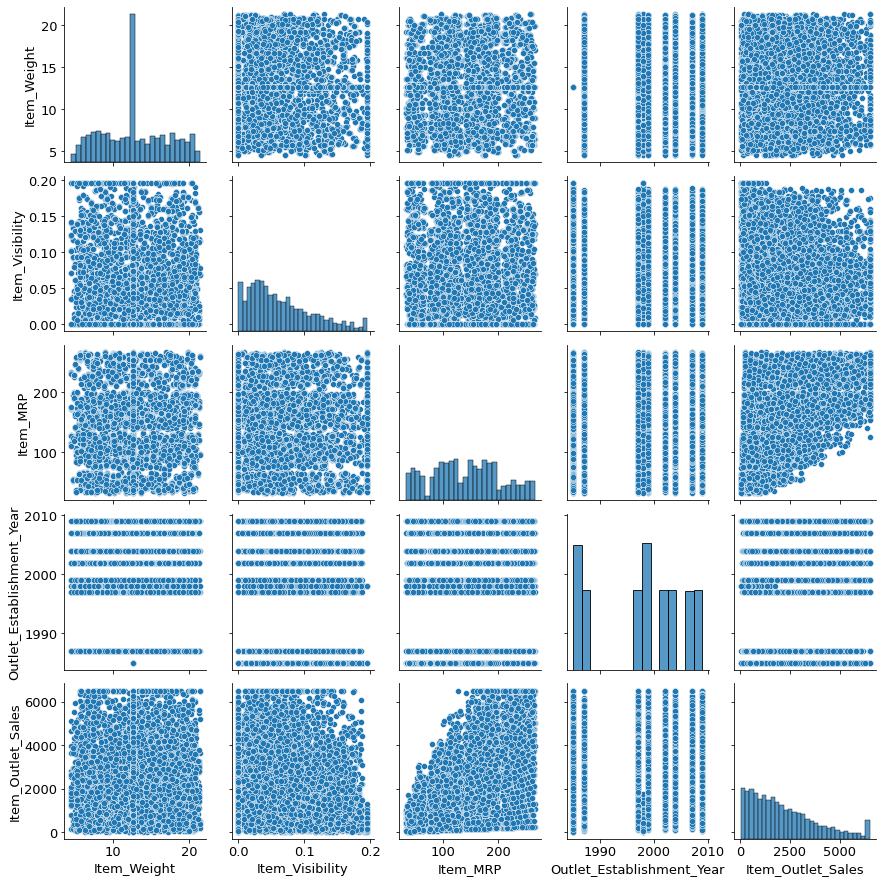

In [48]:
sns.pairplot(data=train_data)
plt.show()

### 4) Encoding
same process for test data
nominal variable is variables have names in the column like cites (no math meaning)
ordinal variable is variables have order (math meaning)
* one hot encoding  - low cardinality nominal variable **[1col -> Ncol]**
* freq encoding or other encodings - high cardinality nominal variable **[1col -> 1col]**
* ordinal encoding - ordinal var by .map() **[1col -> 1col]**
* label encoding  - ordinal/nominal var **[1col -> 1col]**

In [49]:
# one hot encoding can be done also by pd.get_dummies
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,fda15,9.300,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.1380
1,drc01,5.920,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.4228
2,fdn15,17.500,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.2700
3,fdx07,19.200,regular,0.000000,fruits and vegetables,182.0950,out010,1998,medium,tier 3,grocery store,732.3800
4,ncd19,8.930,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,fdf22,6.865,low fat,0.056783,snack foods,214.5218,out013,1987,high,tier 3,supermarket type1,2778.3834
8519,fds36,8.380,regular,0.046982,baking goods,108.1570,out045,2002,medium,tier 2,supermarket type1,549.2850
8520,ncj29,10.600,low fat,0.035186,health and hygiene,85.1224,out035,2004,small,tier 2,supermarket type1,1193.1136
8521,fdn46,7.210,regular,0.145221,snack foods,103.1332,out018,2009,medium,tier 3,supermarket type2,1845.5976


# Train_Test_split should be before imputing NaN but lets continue

In [50]:
y = train_data['Item_Outlet_Sales'].copy()
X = train_data.drop('Item_Outlet_Sales', axis=1).copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [51]:
X_train_num = X_train[numeric_feat]
X_valid_num = X_valid[numeric_feat]
X_train_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
6404,12.60,0.008722,123.5414,1985
5820,18.70,0.014623,52.0324,2002
48,15.85,0.121633,60.6220,1997
4583,12.60,0.145670,247.2776,1985
3791,21.00,0.049296,194.4478,2004
...,...,...,...,...
4373,15.20,0.020280,49.1034,1998
7891,12.60,0.025616,188.1872,1985
4859,13.50,0.000000,78.3960,2004
3264,18.70,0.104890,121.4072,2002


In [52]:
X_train_cat = X_train[catgorical_feat]
X_valid_cat = X_valid[catgorical_feat]
X_train_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,fda56,low fat,fruits and vegetables,out027,medium,tier 3,supermarket type3
5820,drh25,low fat,soft drinks,out045,medium,tier 2,supermarket type1
48,fdl12,regular,baking goods,out046,small,tier 1,supermarket type1
4583,fdb05,low fat,frozen foods,out019,small,tier 1,grocery store
3791,fdh10,low fat,snack foods,out035,small,tier 2,supermarket type1
...,...,...,...,...,...,...,...
4373,ncn29,low fat,health and hygiene,out010,medium,tier 3,grocery store
7891,fdp21,regular,snack foods,out027,medium,tier 3,supermarket type3
4859,fdo22,regular,snack foods,out035,small,tier 2,supermarket type1
3264,fdi52,low fat,frozen foods,out045,medium,tier 2,supermarket type1


##### We can Apply Nominal encoder for columns (Item_Identifier - Item_Fat_Content - Item_Type - Outlet_Identifier - Outlet_Location_Type - Outlet_Type)

##### We can Apply Ordinal encoder for columns (Outlet_Size) else use dummy variables but label_encoder is better

In [53]:
good_label_cols = []
for col in catgorical_feat:
    if set(X_valid[col]).issubset(set(X_train[col])):
        good_label_cols.append(col)
        
bad_label_cols = list(set(catgorical_feat) - set(good_label_cols))
print(good_label_cols)
print()
print(bad_label_cols)

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

['Item_Identifier']


**Note:**

##### Item_Identifier is a noise in the data drop the column it doesnt help
##### but outlet_identifier could help lets check target of Outlet_identifier  

In [54]:
train_data.groupby(['Outlet_Identifier', 'Item_Type']).Item_Outlet_Sales.mean()[0:50]

Outlet_Identifier  Item_Type            
out010             baking goods              254.605090
                   breads                    450.433282
                   breakfast                 453.483778
                   canned                    257.702646
                   dairy                     355.986228
                   frozen foods              332.271189
                   fruits and vegetables     310.734759
                   hard drinks               254.210762
                   health and hygiene        366.765827
                   household                 381.344403
                   meat                      399.440835
                   others                    325.642780
                   seafood                   236.858350
                   snack foods               365.392915
                   soft drinks               337.180143
                   starchy foods             303.752756
out013             baking goods             2048.037282
       

**Same ItemType but diff outlet could change the whole price/target**

**only columns ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] really matter (take look on data to see more) so I will drop Item_Identifier**

In [55]:
X_train_cat[good_label_cols]

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,low fat,fruits and vegetables,out027,medium,tier 3,supermarket type3
5820,low fat,soft drinks,out045,medium,tier 2,supermarket type1
48,regular,baking goods,out046,small,tier 1,supermarket type1
4583,low fat,frozen foods,out019,small,tier 1,grocery store
3791,low fat,snack foods,out035,small,tier 2,supermarket type1
...,...,...,...,...,...,...
4373,low fat,health and hygiene,out010,medium,tier 3,grocery store
7891,regular,snack foods,out027,medium,tier 3,supermarket type3
4859,regular,snack foods,out035,small,tier 2,supermarket type1
3264,low fat,frozen foods,out045,medium,tier 2,supermarket type1


In [56]:
# cardinality
low_cardinality = []
high_cardinality = []
for col in good_label_cols:
    if X_train_cat[col].nunique() < 10:
        low_cardinality.append(col)
    else:
        high_cardinality.append(col)
print(low_cardinality)
print()
print(high_cardinality)

['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

['Item_Type', 'Outlet_Identifier']


So outlet_size is ordinal and rest in nominal low and high lets prepare their lists

In [57]:
low_cardinality.remove('Outlet_Size')

In [58]:
ordinal_encoder_cols = ['Outlet_Size']
low_cardinality_cols = low_cardinality
high_cardinality_cols = high_cardinality
print(ordinal_encoder_cols)
print(low_cardinality_cols)
print(high_cardinality_cols)

['Outlet_Size']
['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Type', 'Outlet_Identifier']


#### a) ordinal Encoder

In [59]:
# Label Encoder for ordinal variables is efficent ^^

#### u can write custome encoder or drop them lets drop them
label_X_train = X_train_cat.drop(bad_label_cols, axis=1) 
label_X_valid = X_valid_cat.drop(bad_label_cols, axis=1)


# Apply ordinal encoder 
ordinal_encoder = OrdinalEncoder() # ordinal encoder

label_X_train_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(label_X_train[ordinal_encoder_cols]), columns=ordinal_encoder_cols, index=X_train.index)
label_X_valid_ordinal = pd.DataFrame(ordinal_encoder.transform(label_X_valid[ordinal_encoder_cols]), columns=ordinal_encoder_cols, index=X_valid.index)
label_X_train_ordinal #data now from labels to numbers

,Outlet_Size
6404,1.0
5820,1.0
48,2.0
4583,2.0
3791,2.0
...,...
4373,1.0
7891,1.0
4859,2.0
3264,1.0


#### b) nominal Encoder

In [60]:
# low cardinality <10 so use dummies
label_X_train_low_card = pd.get_dummies(label_X_train[low_cardinality_cols], columns=low_cardinality_cols, drop_first=True)
label_X_valid_low_card = pd.get_dummies(label_X_valid[low_cardinality_cols], columns=low_cardinality_cols, drop_first=True)
label_X_train_low_card

,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3
6404,0,0,1,0,0,1
5820,0,1,0,1,0,0
48,1,0,0,1,0,0
4583,0,0,0,0,0,0
3791,0,1,0,1,0,0
...,...,...,...,...,...,...
4373,0,0,1,0,0,0
7891,1,0,1,0,0,1
4859,1,1,0,1,0,0
3264,0,1,0,1,0,0


In [61]:
# high cardinality >10 so use freq_encoder / ordinal_encoder
#freq_encoder is better
for col in high_cardinality_cols:
    listo = label_X_train[col].value_counts(normalize=True)
    label_X_train['encoder'+ col] = label_X_train[col].apply(lambda x: listo[x])
    label_X_valid['encoder'+col] = label_X_valid[col].apply(lambda x: listo[x])
label_X_train

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,encoderItem_Type,encoderOutlet_Identifier
6404,low fat,fruits and vegetables,out027,medium,tier 3,supermarket type3,0.147991,0.108976
5820,low fat,soft drinks,out045,medium,tier 2,supermarket type1,0.048401,0.108830
48,regular,baking goods,out046,small,tier 1,supermarket type1,0.074802,0.113376
4583,low fat,frozen foods,out019,small,tier 1,grocery store,0.102523,0.063068
3791,low fat,snack foods,out035,small,tier 2,supermarket type1,0.143737,0.107803
...,...,...,...,...,...,...,...,...
4373,low fat,health and hygiene,out010,medium,tier 3,grocery store,0.062042,0.063215
7891,regular,snack foods,out027,medium,tier 3,supermarket type3,0.143737,0.108976
4859,regular,snack foods,out035,small,tier 2,supermarket type1,0.143737,0.107803
3264,low fat,frozen foods,out045,medium,tier 2,supermarket type1,0.102523,0.108830


In [62]:
label_X_train_high_card = label_X_train.iloc[:, -len(high_cardinality_cols):]
label_X_valid_high_card = label_X_valid.iloc[:, -len(high_cardinality_cols):]
label_X_train_high_card

,encoderItem_Type,encoderOutlet_Identifier
6404,0.147991,0.108976
5820,0.048401,0.108830
48,0.074802,0.113376
4583,0.102523,0.063068
3791,0.143737,0.107803
...,...,...
4373,0.062042,0.063215
7891,0.143737,0.108976
4859,0.143737,0.107803
3264,0.102523,0.108830


In [63]:
# lets concat label_X_train with X_train_num
X_train_model = pd.concat([X_train_num, label_X_train_ordinal, label_X_train_low_card, label_X_train_high_card], axis=1)
X_train_model

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3,encoderItem_Type,encoderOutlet_Identifier
6404,12.60,0.008722,123.5414,1985,1.0,0,0,1,0,0,1,0.147991,0.108976
5820,18.70,0.014623,52.0324,2002,1.0,0,1,0,1,0,0,0.048401,0.108830
48,15.85,0.121633,60.6220,1997,2.0,1,0,0,1,0,0,0.074802,0.113376
4583,12.60,0.145670,247.2776,1985,2.0,0,0,0,0,0,0,0.102523,0.063068
3791,21.00,0.049296,194.4478,2004,2.0,0,1,0,1,0,0,0.143737,0.107803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,15.20,0.020280,49.1034,1998,1.0,0,0,1,0,0,0,0.062042,0.063215
7891,12.60,0.025616,188.1872,1985,1.0,1,0,1,0,0,1,0.143737,0.108976
4859,13.50,0.000000,78.3960,2004,2.0,1,1,0,1,0,0,0.143737,0.107803
3264,18.70,0.104890,121.4072,2002,1.0,0,1,0,1,0,0,0.102523,0.108830


##### Same for validation data

In [64]:
X_valid_model = pd.concat([X_valid_num, label_X_valid_ordinal, label_X_valid_low_card, label_X_valid_high_card], axis=1)
X_valid_model

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3,encoderItem_Type,encoderOutlet_Identifier
4931,14.500,0.089960,159.5604,2002,1.0,0,1,0,1,0,0,0.062042,0.108830
4148,12.600,0.009535,64.5510,1985,1.0,0,0,1,0,0,1,0.143737,0.108976
7423,11.500,0.017742,129.6626,2007,1.0,0,1,0,1,0,0,0.062042,0.109123
4836,10.195,0.000000,143.1154,2007,1.0,0,1,0,1,0,0,0.102523,0.109123
944,21.000,0.049264,195.0478,1987,0.0,0,0,1,1,0,0,0.143737,0.107070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,12.500,0.112682,119.1440,2009,1.0,0,0,1,0,1,0,0.077002,0.109123
6179,12.600,0.195979,186.2924,1985,2.0,1,0,0,0,0,0,0.048401,0.063068
1861,12.800,0.069561,263.0252,1987,0.0,0,0,1,1,0,0,0.017014,0.107070
3598,12.600,0.162857,54.5956,1985,2.0,0,0,0,0,0,0,0.106043,0.063068


In [65]:
X_train_model.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3,encoderItem_Type,encoderOutlet_Identifier
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.858552,0.065374,140.533479,1997.846289,1.177178,0.354796,0.325755,0.388384,0.655617,0.109123,0.108976,0.092914,0.103421
std,4.224604,0.048698,62.450304,8.360943,0.599982,0.478487,0.468691,0.487418,0.475201,0.311816,0.311632,0.041579,0.015402
min,4.555000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007334,0.063068
25%,9.395000,0.027077,93.221850,1987.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062042,0.107803
50%,12.600000,0.054209,142.115400,1999.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.102523,0.108976
75%,16.100000,0.094352,185.684500,2004.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.143737,0.109123
max,21.350000,0.195979,266.888400,2009.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.147991,0.113376


In [66]:
X_valid_model.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3,encoderItem_Type,encoderOutlet_Identifier
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,12.632944,0.065039,142.829455,1997.774194,1.145455,0.344282,0.330792,0.411730,0.649267,0.107918,0.112610,0.089351,0.103117
std,4.234198,0.049422,61.553240,8.417093,0.601215,0.475273,0.470636,0.492291,0.477340,0.310368,0.316208,0.041574,0.015545
min,4.590000,0.000000,31.955800,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007334,0.063068
25%,9.210000,0.026827,96.375200,1987.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062042,0.107803
50%,12.600000,0.052716,144.247000,1999.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.078175,0.108976
75%,15.850000,0.096295,185.624000,2004.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.143737,0.109123
max,21.350000,0.195979,266.588400,2009.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.147991,0.113376


In [67]:
# same for Test data


### 5) Data Standarization (Normalizing and Scaling) 
**Data preprocessing**: change features b4 feeding it into the model

Note: same process for Test Data with parameters of train data
* to make features have same scale so chane in one cant affect result more than change in another feat (if model calc distance) 

   by MinMaxScaler (change range 0-1) or StandarizeDate(StandardScaler) change daussian dist into standard gauisan dist (mean=1, std = 1)


* feat have normal dist (if model use dist) by boxcox

In [68]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
# std_scale.fit(X_train_model)
i = 0
for col in X_train_model.columns:
    if ((i < 4) or (i > 10)): #standartScaler or any method
        print(col)
        listo = np.asarray(X_train_model[col]) #array
        listo = listo.reshape(-1, 1)
        listo_testo = np.asarray(X_valid_model[col]) #array
        listo_testo= listo_testo.reshape(-1, 1)
        X_train_model[col] = std_scale.fit_transform(listo)
        X_valid_model[col] = std_scale.transform(listo_testo) #by this no data leakage (no info leakage), 'Same for Valid Data'
    i = i + 1
X_train_model.describe()

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
encoderItem_Type
encoderOutlet_Identifier


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3,encoderItem_Type,encoderOutlet_Identifier
count,6.818000e+03,6.818000e+03,6.818000e+03,6.818000e+03,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6.818000e+03,6.818000e+03
mean,3.444329e-16,-1.042157e-17,-1.172427e-16,3.829927e-17,1.177178,0.354796,0.325755,0.388384,0.655617,0.109123,0.108976,2.855511e-16,-3.871614e-16
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,0.599982,0.478487,0.468691,0.487418,0.475201,0.311816,0.311632,1.000073e+00,1.000073e+00
min,-1.965666e+00,-1.342527e+00,-1.749415e+00,-1.536577e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.058432e+00,-2.620096e+00
25%,-8.199124e-01,-7.864627e-01,-7.576440e-01,-1.297352e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.425616e-01,2.845491e-01
50%,-6.120587e-02,-2.292869e-01,2.533274e-02,1.379982e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.311119e-01,3.607365e-01
75%,7.673348e-01,5.950851e-01,7.230442e-01,7.360608e-01,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.222424e+00,3.702599e-01
max,2.010146e+00,2.682115e+00,2.023436e+00,1.334123e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.324731e+00,6.464393e-01


In [69]:
X_valid_model.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_regular,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3,encoderItem_Type,encoderOutlet_Identifier
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,-0.053407,-0.006882,0.036768,-0.008624,1.145455,0.344282,0.330792,0.411730,0.649267,0.107918,0.112610,-0.085693,-0.019681
std,1.002344,1.014928,0.985708,1.006790,0.601215,0.475273,0.470636,0.492291,0.477340,0.310368,0.316208,0.999963,1.009352
min,-1.957380,-1.342527,-1.738753,-1.536577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.058432,-2.620096
25%,-0.863707,-0.791604,-0.707147,-1.297352,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.742562,0.284549
50%,-0.061206,-0.259948,0.059468,0.137998,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.354503,0.360737
75%,0.708153,0.635002,0.722075,0.736061,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.222424,0.370260
max,2.010146,2.682115,2.018632,1.334123,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.324731,0.646439


In [70]:
# Same for Test Data


 Min: -1.9656658178863087 Max: 2.0101458456318935 
 mean: 3.4443293365901014e-16 std: 1.000073343357024 
 median: -0.061205869508581305 
 mode: -0.061205869508581305


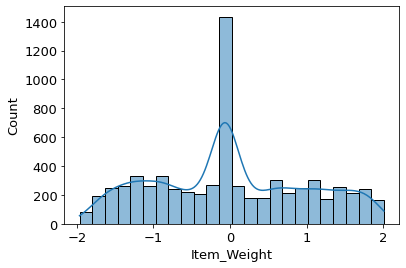

 Min: -1.3425266333251322 Max: 2.682114734452559 
 mean: -1.0421571366384573e-17 std: 1.0000733433570241 
 median: -0.2292869485392683 
 mode: -1.3425266333251322


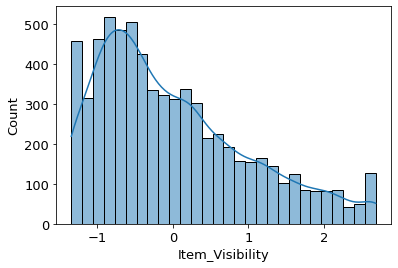

 Min: -1.749414883192024 Max: 2.023435919448578 
 mean: -1.1724267787182645e-16 std: 1.000073343357024 
 median: 0.025332735395223523 
 mode: 0.5045777192340986


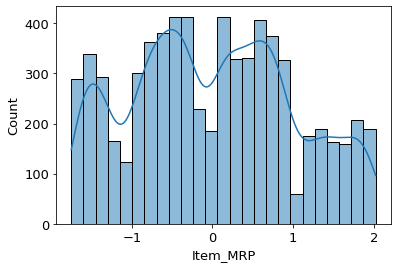

 Min: -1.5365768161712994 Max: 1.3341232681314665 
 mean: 3.8299274771463306e-17 std: 1.000073343357024 
 median: 0.13799823300531416 
 mode: -1.5365768161712994


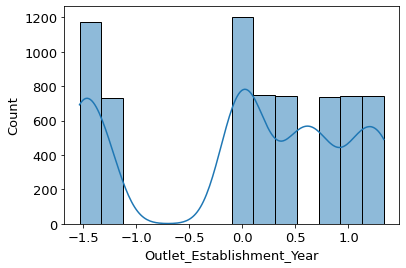

 Min: 0.0 Max: 2.0 
 mean: 1.1771780580815487 std: 0.5999815294498794 
 median: 1.0 
 mode: 1.0


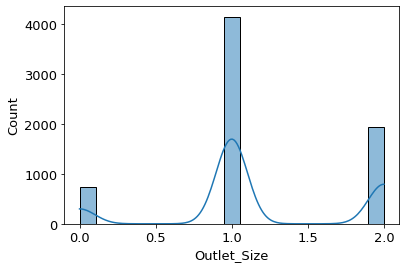

 Min: 0 Max: 1 
 mean: 0.3547961278967439 std: 0.4784865888082165 
 median: 0.0 
 mode: 0


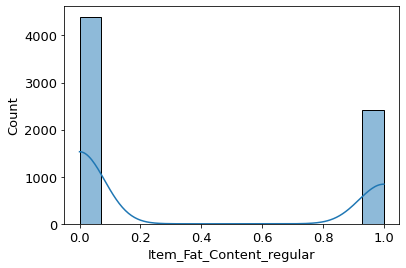

 Min: 0 Max: 1 
 mean: 0.3257553534760927 std: 0.46869075351831174 
 median: 0.0 
 mode: 0


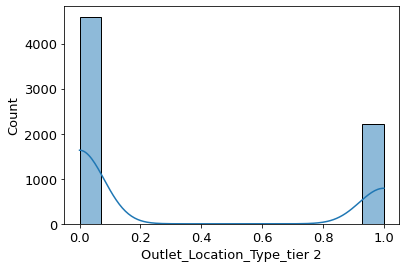

 Min: 0 Max: 1 
 mean: 0.3883836902317395 std: 0.48741834690285724 
 median: 0.0 
 mode: 0


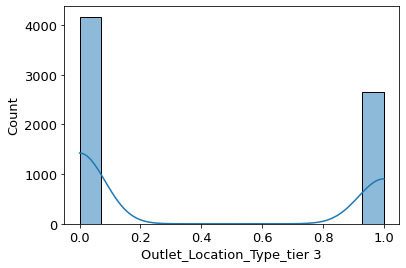

 Min: 0 Max: 1 
 mean: 0.6556174831328836 std: 0.4752013463296067 
 median: 1.0 
 mode: 1


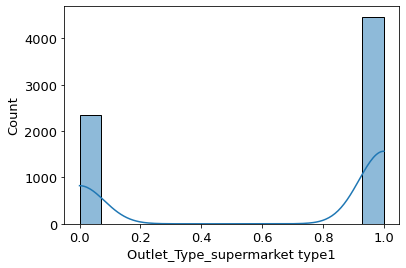

 Min: 0 Max: 1 
 mean: 0.10912290994426518 std: 0.3118162297831029 
 median: 0.0 
 mode: 0


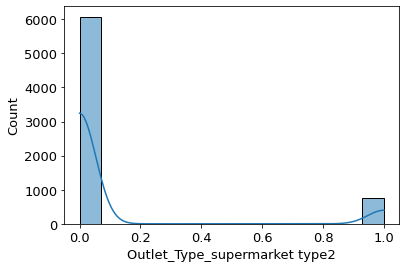

 Min: 0 Max: 1 
 mean: 0.1089762393663831 std: 0.3116322552041286 
 median: 0.0 
 mode: 0


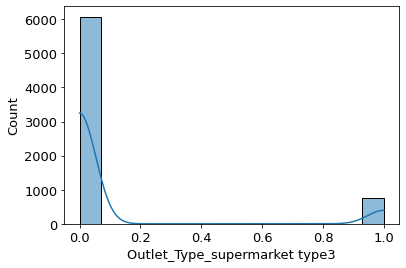

 Min: -2.058431923099491 Max: 1.324730741640591 
 mean: 2.855510554389373e-16 std: 1.000073343357024 
 median: 0.2311119449050061 
 mode: 1.324730741640591


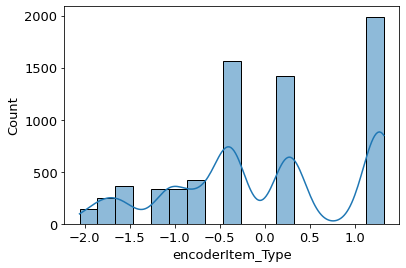

 Min: -2.620096478495438 Max: 0.64643934566533 
 mean: -3.871613762611869e-16 std: 1.000073343357024 
 median: 0.360736503901998 
 mode: 0.3702599319607758


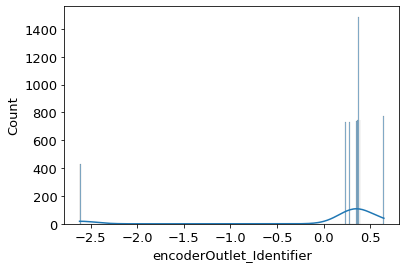

In [71]:
# After Scaling features have same dist so should be normalized for linear models
for col in X_train_model.columns:
    sns.histplot(x = X_train_model[col], kde=True)
    print(' Min:', X_train_model[col].min(), 'Max:', X_train_model[col].max(), '\n mean:', X_train_model[col].mean(), 'std:', X_train_model[col].std(),'\n', 'median:', X_train_model[col].median(), '\n', 'mode:', X_train_model[col].mode()[0])
    plt.show() #from outlet 017 and 027 have alot of item weights 12.5

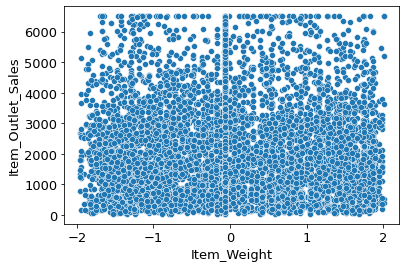

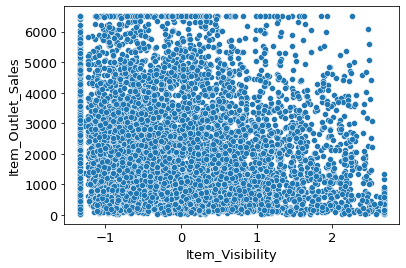

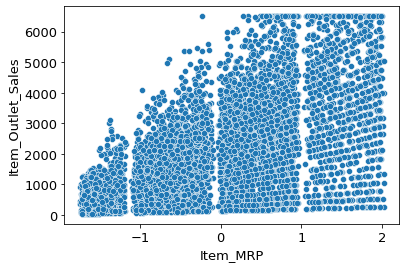

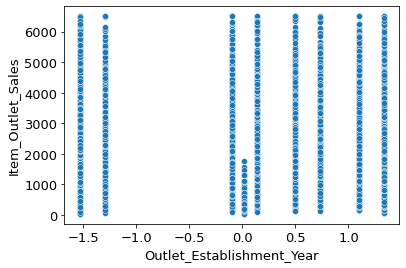

In [72]:
# After Scaling features have RR with target
for col in numeric_feat:
    sns.scatterplot(x = X_train_model[col], y = y_train)
#     print(' Min:', X_train_model[col].min(), 'Max:', X_train_model[col].max(), '\n mean:', X_train_model[col].mean(), 'std:', X_train_model[col].std(),'\n', 'median:', X_train_model[col].median(), '\n', 'mode:', X_train_model[col].mode()[0])
    plt.show() #from outlet 017 and 027 have alot of item weights 12.5

In [85]:
train_db = pd.concat([X_train_model, y_train], axis=1)
test_db = pd.concat([X_valid_model, y_valid], axis=1)
train_db.to_csv("Train_DB.csv")
test_db.to_csv("Test_DB.csv")

### 6) Modeling & Feature Engineering
same process for test data
* first make model to get baseline accuracy 
* seoncd add new features using (basics - domain knowledge - clustering - PCA)

In [73]:
# Normalize features for linear model
# so we used StandardScaler so features already normalized
# (mabye doesnt follow normal dist thats bcz orignaly standardscaler should be applied to normal dist features
# if not then use MinMaxScaler or preprocessing.normalized)

#### 1) Linear Regression

In [74]:
model_1 = LinearRegression() #intercept by default is True and Normalize is false i already normalized
model_1.fit(X_train_model, y_train) # calc weights
r_square = model_1.score(X_train_model, y_train)
y_preds = model_1.predict(X_train_model)
print("Training Acc: ", r_square*100, ' %') # acc = 57.7% so its underfitting so acc will be bad also at validation
print("Mean Abs Error: ", mean_absolute_error(y_preds, y_train))

Training Acc:  57.74736676308769  %
Mean Abs Error:  804.1343969305124


In [75]:
r_square = model_1.score(X_valid_model, y_valid)
y_preds = model_1.predict(X_valid_model)
print("Validation Acc: ", r_square*100, ' %') # acc = 57.2%
print("Mean Abs Error: ", mean_absolute_error(y_preds, y_valid))

Validation Acc:  57.20587845307373  %
Mean Abs Error:  829.4010508524466


In [76]:
print(f"intercept: {model_1.intercept_}")
print(f"slope: {model_1.coef_}") # to see how prediction change according to which column

intercept: -1653.97582996128
slope: [-5.73404626e+00 -1.62307136e+01  9.32637216e+02  1.06285056e+02
  7.96264812e+01  5.00970434e+01 -1.94414268e+02 -1.37600671e+01
  4.20579914e+03  3.68322154e+03  5.54777329e+03 -4.01147177e+00
 -7.51907376e+02]


In [77]:
# 3 steps to inc model acc:
# 1) Tune Hyperparamers
# 2) Add features increase baseline acc
# 3) Bias -> Variance trade-off to know problem and solve it
# 4) stack models and give weight for each model (after you finish step 3)

#### 2) Random Forest

In [78]:
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
model = RandomForestRegressor(n_estimators=100, random_state=0)
#dont fit as it will fitted it cross_val_score
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_model, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE Training-Set: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE Training-Set: -762.395 (25.671)


In [79]:
n_scores = cross_val_score(model, X_valid_model, y_valid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE Testing-Set: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE Testing-Set: -787.870 (48.149)


In [80]:
model.fit(X_train_model, y_train)
acc_training = model.score(X_train_model, y_train)
acc_testing = model.score(X_valid_model, y_valid)
print('Acc training :', acc_training * 100, ' %\nAcc testing :', acc_testing * 100, ' %')

Acc training : 93.99550485322938  %
Acc testing : 55.619190483516846  %


In [81]:
# model is overfitting on training data so tune typerparameters and add features then check bias -> variance trade off again
# you can predict using model.predict

#### 3) XGBoost

In [82]:
my_model = XGBRegressor(n_estimators=500, early_stopping_rounds=5, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train_model, y_train, 
             eval_set=[(X_valid_model, y_valid)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=5, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
acc_training = my_model.score(X_train_model, y_train)
acc_testing = my_model.score(X_valid_model, y_valid)
predictions_training = my_model.predict(X_train_model)
predictions_testing = my_model.predict(X_valid_model)
print('Acc training :', acc_training *100, '%')
print("MAE Training: " + str(mean_absolute_error(predictions_training, y_train)))
print()
print('Acc Testing :', acc_testing *100, '%')
print("MAE Testing: " + str(mean_absolute_error(predictions_testing, y_valid)))

Acc training : 66.68181556019445 %
MAE Training: 670.804973393284

Acc Testing : 59.160555117402566 %
MAE Testing: 757.7761438906207
